# Supervised Regression

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [159]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [160]:
#Load dataset
data=pd.read_csv(r"C:\Users\ano_k\Entri class\CarPrice_Assignment.csv")

In [161]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [162]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [163]:
print("Number of rows=",data.shape[0])
print("Number of columns=",data.shape[1])

Number of rows= 205
Number of columns= 26


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [165]:
#Check null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values present in this dataset

In [166]:
data[data.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There are no duplicate values in this dataset

In [167]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preprocessing

In [168]:
data.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


<Axes: xlabel='price'>

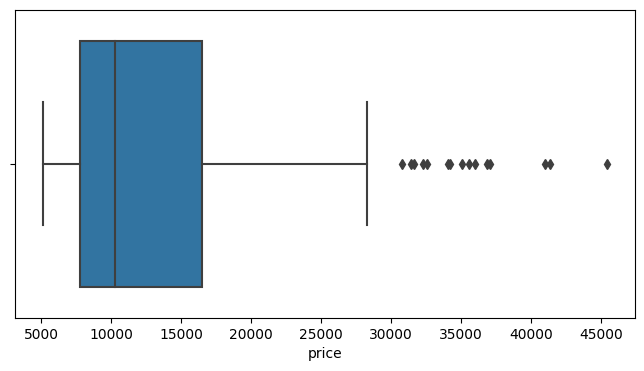

In [169]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['price'])

In [170]:
sorted(data['price'],reverse=True)

[45400.0,
 41315.0,
 40960.0,
 37028.0,
 36880.0,
 36000.0,
 35550.0,
 35056.0,
 34184.0,
 34028.0,
 32528.0,
 32250.0,
 31600.0,
 31400.5,
 30760.0,
 28248.0,
 28176.0,
 25552.0,
 24565.0,
 23875.0,
 22625.0,
 22470.0,
 22018.0,
 21485.0,
 21105.0,
 20970.0,
 19699.0,
 19045.0,
 18950.0,
 18920.0,
 18620.0,
 18420.0,
 18399.0,
 18344.0,
 18280.0,
 18150.0,
 18150.0,
 17950.0,
 17859.167,
 17710.0,
 17669.0,
 17450.0,
 17199.0,
 17075.0,
 16925.0,
 16900.0,
 16845.0,
 16695.0,
 16630.0,
 16558.0,
 16515.0,
 16503.0,
 16500.0,
 16500.0,
 16430.0,
 15998.0,
 15985.0,
 15750.0,
 15690.0,
 15645.0,
 15580.0,
 15510.0,
 15250.0,
 15040.0,
 14869.0,
 14489.0,
 14399.0,
 13950.0,
 13860.0,
 13845.0,
 13645.0,
 13499.0,
 13499.0,
 13495.0,
 13415.0,
 13295.0,
 13200.0,
 12964.0,
 12945.0,
 12940.0,
 12764.0,
 12629.0,
 12440.0,
 12290.0,
 12170.0,
 11900.0,
 11850.0,
 11845.0,
 11694.0,
 11595.0,
 11549.0,
 11259.0,
 11248.0,
 11245.0,
 11199.0,
 11048.0,
 10945.0,
 10898.0,
 10795.0,
 10698.0

In [171]:
#target value price
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [172]:
#IQR Of price
Q1,Q3 = data['price'].quantile([0.25,0.75])
print("25 percentile:",Q1,"\n75 percentile:",Q3)
IQR=Q3-Q1
print("IQR=",IQR)
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR 
print("Lower whisker price =",lower_whisker,"Upper whisker price =",upper_whisker)

25 percentile: 7788.0 
75 percentile: 16503.0
IQR= 8715.0
Lower whisker price = -5284.5 Upper whisker price = 29575.5


In [173]:
data_new=data[data['price']<=upper_whisker]
data_new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: xlabel='price'>

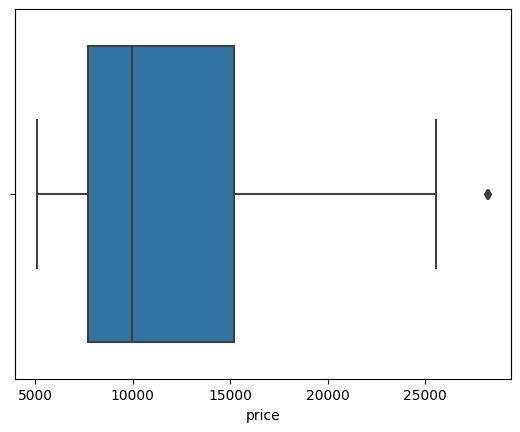

In [174]:
sns.boxplot(x=data_new['price'])

# Encoding

In [175]:
data_new.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [176]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            190 non-null    int64  
 1   symboling         190 non-null    int64  
 2   CarName           190 non-null    object 
 3   fueltype          190 non-null    object 
 4   aspiration        190 non-null    object 
 5   doornumber        190 non-null    object 
 6   carbody           190 non-null    object 
 7   drivewheel        190 non-null    object 
 8   enginelocation    190 non-null    object 
 9   wheelbase         190 non-null    float64
 10  carlength         190 non-null    float64
 11  carwidth          190 non-null    float64
 12  carheight         190 non-null    float64
 13  curbweight        190 non-null    int64  
 14  enginetype        190 non-null    object 
 15  cylindernumber    190 non-null    object 
 16  enginesize        190 non-null    int64  
 17  fu

In [177]:
print("fuel type:",data_new['fueltype'].unique())
print("aspiration:",data_new['aspiration'].unique())
print("doornumber:",data_new['doornumber'].unique())
print("carbody:",data_new['carbody'].unique())
print("enginetype:",data_new['enginetype'].unique())
print("cylindernumber:",data_new['cylindernumber'].unique())
print("fuelsystem:",data_new['fuelsystem'].unique())

fuel type: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
cylindernumber: ['four' 'six' 'five' 'three' 'two']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [178]:
#Label encoding
label_encoder = LabelEncoder()
for i in data_new[["fueltype","aspiration","doornumber","carbody","drivewheel","fuelsystem","enginetype","cylindernumber"]]:
    data_new[i] = label_encoder.fit_transform(data_new[i])
data_new

C:\Users\ano_k\AppData\Local\Temp\ipykernel_6216\3751599596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[i] = label_encoder.fit_transform(data_new[i])
C:\Users\ano_k\AppData\Local\Temp\ipykernel_6216\3751599596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[i] = label_encoder.fit_transform(data_new[i])
C:\Users\ano_k\AppData\Local\Temp\ipykernel_6216\3751599596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,front,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,front,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,front,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,0,3,2,front,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,0,3,2,front,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,0,3,2,front,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,0,3,2,front,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [179]:
data_new.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,front,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0


In [180]:
data_new.drop(columns='CarName',inplace=True)

C:\Users\ano_k\AppData\Local\Temp\ipykernel_6216\3042307324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop(columns='CarName',inplace=True)


In [181]:
data_new.drop(columns='enginelocation',inplace=True)

C:\Users\ano_k\AppData\Local\Temp\ipykernel_6216\1482896173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop(columns='enginelocation',inplace=True)


In [182]:
data_new.head(1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,1,0,2,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0


In [183]:
corr_columns=[]
for i in data_new.columns:
    corr2=data_new[[i,'price']].corr()
    print(i,corr2.iloc[0][1].round(1))
    if abs(corr2.iloc[0][1])>0.5:
         corr_columns.append(i)
print("Correlated columns : ",corr_columns)
data_new=data_new[corr_columns]
data_new

car_ID 0.0
symboling -0.1
fueltype -0.2
aspiration 0.4
doornumber -0.1
carbody 0.1
drivewheel 0.5
wheelbase 0.7
carlength 0.7
carwidth 0.8
carheight 0.3
curbweight 0.9
enginetype -0.0
cylindernumber 0.0
enginesize 0.7
fuelsystem 0.6
boreratio 0.5
stroke 0.1
compressionratio 0.2
horsepower 0.7
peakrpm -0.1
citympg -0.7
highwaympg -0.7
price 1.0
Correlated columns :  ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'price']


,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


<Axes: >

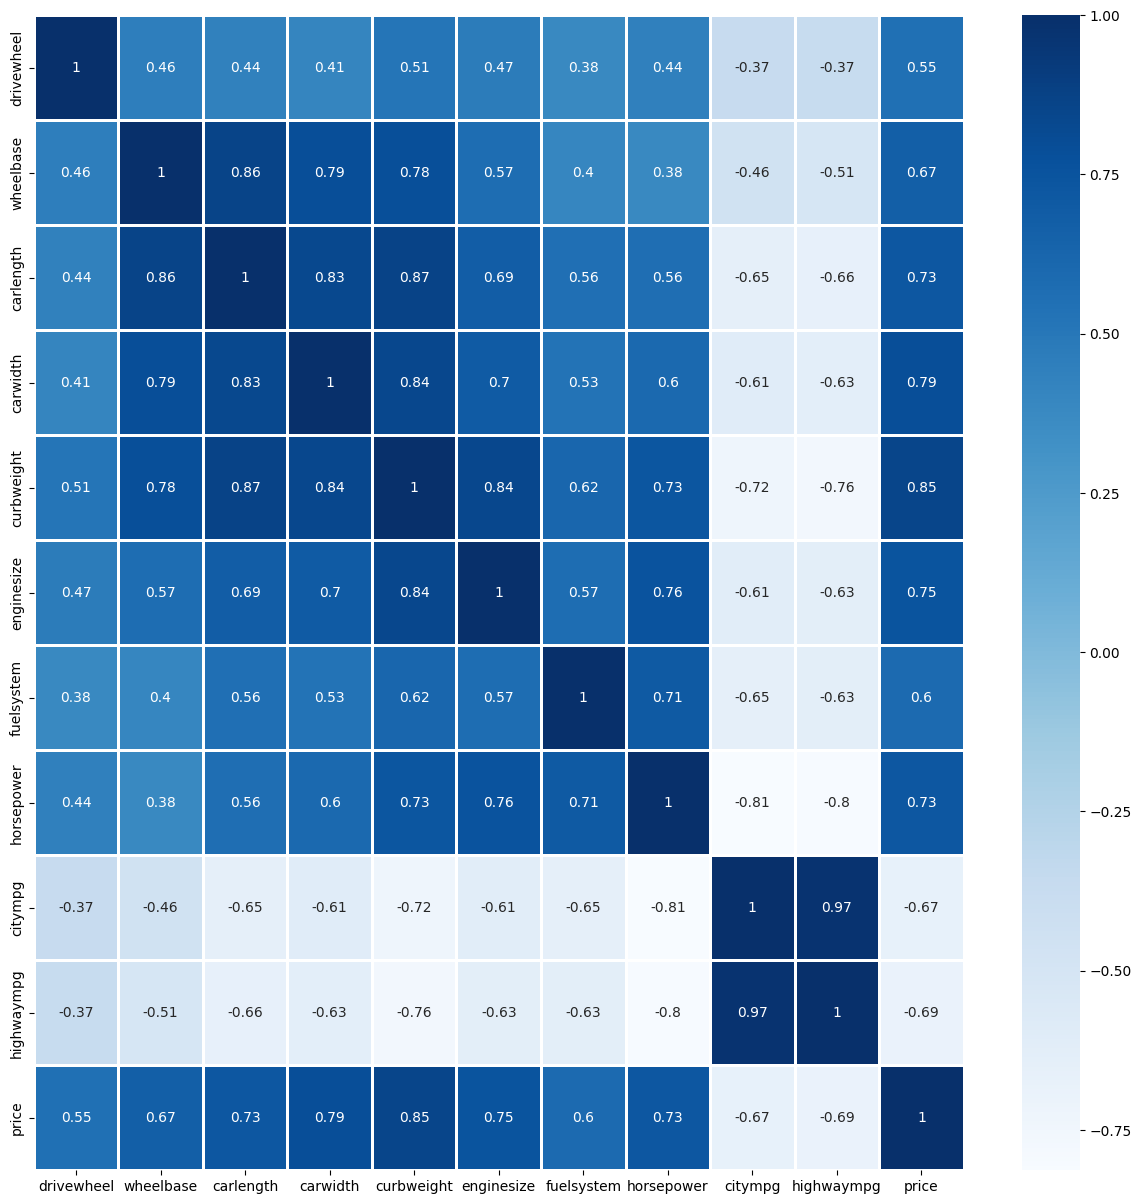

In [184]:
plt.figure(figsize=(15,15))
sns.heatmap(data_new.corr(),annot=True,linewidth=1,cmap="Blues")

# scaling

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_new)
scaled_data = scaler.transform(data_new)
print(scaled_data)

[[1.         0.07246377 0.47923875 ... 0.15151515 0.20588235 0.36217034]
 [1.         0.07246377 0.47923875 ... 0.15151515 0.20588235 0.4920882 ]
 [1.         0.28623188 0.52076125 ... 0.09090909 0.17647059 0.4920882 ]
 ...
 [1.         0.81521739 0.82525952 ... 0.06060606 0.08823529 0.70760917]
 [1.         0.81521739 0.82525952 ... 0.3030303  0.20588235 0.75019455]
 [1.         0.81521739 0.82525952 ... 0.09090909 0.14705882 0.75689581]]


# Regression Algorithms

In [186]:
# Store feature matrix in x and target in y
column=['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg']
x=data_new[column]
y= data_new['price'] 

In [187]:
#splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

Here we assign the independent variable to 'x' and the dependent variable to 'y'. Then we split the dataset into two – train data and test data. 80% data to train dataset and 20% data to test dataset.

In [188]:
#import the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Linear regression

In [189]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

Result intepretation

Once the model is fitted, the results to check whether the model works satisfactorily and to interpret it.

By checking 𝑅² using .score() called in the model we get the coefficient of determination:The coefficient of determination is the square of the correlation (r), so it ranges from 0 to 1

In [190]:
y_pred=linear.predict(x_test)
y_pred

array([ 8399.29916123, 16666.34312851,  7492.08458656,  6840.13636332,
       18969.43959218,  1366.91230706, 16501.75845346,  6240.504824  ,
        7691.57744475,  7737.54225754,  7094.23284506, 20081.46147345,
        6058.09362268, 18818.83397775,  6350.90113089, 12969.58727271,
       17905.80292064,  7505.28663908, 10977.80676785,  6440.26810295,
        7597.54094212,  9161.16669649, 14193.42275691, 18655.52586812,
        8833.40903546,  8870.04152787,  7024.17151511,  6574.84831979,
        6862.38790943, 10562.77510361,  9425.66529848,  7847.73797442,
       12238.20281161, 10654.80614167,  9029.38762853, 18431.05356558,
        5882.88430593, 10750.62845426])

In [191]:
#Evaluation
from sklearn import metrics
r_score=metrics.r2_score(y_test,y_pred)
print("r score=",r_score)

r score= 0.7812434760489171


In [192]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3677195.567356482

In [193]:
np.sqrt(mse)

1917.6015142246008

The linear regression model does not predict correctly. MSE value is too hig

In [194]:
x_test

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg
190,1,94.5,165.7,64.0,2221,109,5,90,24,29
195,2,104.3,188.8,67.2,3034,141,5,114,23,28
122,1,93.7,167.3,63.8,2191,98,1,68,31,38
76,1,93.7,157.3,64.4,1918,92,1,68,37,41
112,2,107.9,186.7,68.4,3252,152,3,95,28,33
18,1,88.4,141.1,60.3,1488,61,1,48,47,53
9,0,99.5,178.2,67.9,3053,131,5,160,16,22
19,1,94.5,155.9,63.6,1874,90,1,70,38,43
156,1,95.7,166.3,64.4,2081,98,1,70,30,37
139,1,93.7,157.9,63.6,2120,108,1,73,26,31


In [195]:
y_test

190     9980.000
195    13415.000
122     7609.000
76      5389.000
112    16900.000
18      5151.000
9      17859.167
19      6295.000
156     6938.000
139     7053.000
120     6229.000
106    18399.000
21      5572.000
179    15998.000
96      7499.000
135    15510.000
115    16630.000
77      6189.000
62     10245.000
45      8916.500
33      6529.000
27      8558.000
170    11199.000
108    13200.000
79      7689.000
142     7775.000
138     5118.000
22      6377.000
51      6095.000
86      8189.000
183     7975.000
78      6669.000
5      15250.000
147    10198.000
184     7995.000
178    16558.000
89      5499.000
123     8921.000
Name: price, dtype: float64

In [196]:
linear.coef_

array([1441.94437345,   70.19353222,  -92.73793125,  884.40048121,
          5.70752226,    5.84325859,  -16.07616472,   25.39148906,
       -159.47952194,  146.70747818])

In [197]:
linear.intercept_

-56856.07324594719

In [198]:
linear.coef_*28.0+linear.intercept_

array([-16481.63078945, -54890.65434376, -59452.73532084, -32092.85977202,
       -56696.26262279, -56692.46200547, -57306.20585809, -56145.11155214,
       -61321.49986035, -52748.26385685])

# Random Forest Regression

In [199]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [200]:
y_pred1=rf.predict(x_test)
y_pred1

array([ 9967.08      , 15439.87      ,  7529.535     ,  5968.175     ,
       16818.09      ,  6199.02      , 17717.05      ,  7811.755     ,
        7489.7       ,  7688.045     ,  6482.125     , 17607.91      ,
        5966.335     , 18532.24      ,  7213.44      , 15223.53      ,
       13354.68      ,  6558.9175    ,  9402.34166667,  7398.655     ,
        6953.2       ,  8435.66      , 12800.        , 16841.29      ,
        8368.65      ,  7844.07      ,  7530.535     ,  6296.575     ,
        6471.21      ,  8230.68666667,  8250.21      ,  7193.662     ,
       12966.41      , 10256.27      ,  7900.2       , 18516.99      ,
        6948.64      , 10152.64833333])

In [201]:
r_score1=metrics.r2_score(y_test,y_pred1)
print("r score=",r_score1)

r score= 0.8976560850696268


# Support Vector Machine

In [202]:
SVM=SVR()
SVM.fit(x_train,y_train)

SVR()

In [203]:
y_pred2=SVM.predict(x_test)
y_pred2

array([10318.21429346, 10331.36643783, 10317.71456054, 10313.75117214,
       10334.35761074, 10309.02058162, 10331.67585494, 10313.17443643,
       10316.05282779, 10316.64227219, 10314.41530337, 10332.92850441,
       10313.19931292, 10331.16228498, 10314.47861866, 10327.04397225,
       10331.93255661, 10314.10217322, 10321.26456994, 10313.63133264,
       10314.05382912, 10317.74751931, 10325.77090912, 10333.6412995 ,
       10317.04141322, 10317.72349135, 10315.59494089, 10313.20079881,
       10313.51434963, 10321.18431298, 10318.02263538, 10314.93256011,
       10322.90829989, 10322.00399769, 10318.84390806, 10330.56326752,
       10313.37718357, 10323.33652468])

In [204]:
r_score2=metrics.r2_score(y_test,y_pred2)
print("r score=",r_score2)

r score= -0.021657976377601917


# K-Nearest Neighbor

In [205]:
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [206]:
y_pred3=KNN.predict(x_test)
y_pred3

array([ 8705.2, 19418. ,  7902.4,  6488. , 16790.8,  6568.9, 20096. ,
        6576.1,  7526.2,  7979.4,  6680. , 16557.6,  6576.1, 19402.8,
        6635.4, 16152. , 20632. ,  7073.4,  9727.8,  6157.2,  7073.4,
        7902.4, 13428.8, 17512. ,  8131.2,  7902.4,  7356. ,  6610.7,
        6157.2,  9764.2,  7997.8,  7266.6, 10953.6, 11206.2,  7655.4,
       17071.4,  6826.1, 12169. ])

In [207]:
r_score3=metrics.r2_score(y_test,y_pred3)
print("r score=",r_score3)

r score= 0.7591109213268274


# Decision Tree Regressor

In [208]:
DT=DecisionTreeRegressor(random_state = 0)  
DT.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [209]:
y_pred = DT.predict(x_test) 
r_score4=DT.score(x_test,y_test)
print("r score=",r_score4)
print("The r2_score of our model is",round(r2_score(y_test, y_pred), 2) *100,"%")

r score= 0.8145309513027782
The r2_score of our model is 81.0 %


# Dimension Reductionality:Principal Component Analysis(PCA)

In [211]:
data_new

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,2,88.6,168.8,64.1,2548,130,5,111,21,27,13495.0
1,2,88.6,168.8,64.1,2548,130,5,111,21,27,16500.0
2,2,94.5,171.2,65.5,2823,152,5,154,19,26,16500.0
3,1,99.8,176.6,66.2,2337,109,5,102,24,30,13950.0
4,0,99.4,176.6,66.4,2824,136,5,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,109.1,188.8,68.9,2952,141,5,114,23,28,16845.0
201,2,109.1,188.8,68.8,3049,141,5,160,19,25,19045.0
202,2,109.1,188.8,68.9,3012,173,5,134,18,23,21485.0
203,2,109.1,188.8,68.9,3217,145,3,106,26,27,22470.0


In [212]:
target_col='price'
x=data_new.drop(target_col,axis=1)
y=data_new[target_col]

In [213]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [214]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [215]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [216]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.64870179, 0.12043802, 0.07566555, 0.05370679, 0.04452428,
       0.02248747, 0.01227452, 0.01093284, 0.00872558, 0.00254316])

In [217]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(x_train)
print(x_test)

[[ 0.04893955 -1.23856749]
 [ 1.63751099  0.21014732]
 [-1.37190157 -0.19430654]
 [ 0.02787349  1.97941587]
 [-0.24270922  0.51542698]
 [-0.19045272 -1.19528173]
 [-0.1809872  -1.18694743]
 [ 4.66928471  0.49973394]
 [ 0.50142098 -0.42289625]
 [-1.1995442  -0.51168165]
 [-3.82626476 -0.26780067]
 [ 3.3744895  -0.55943907]
 [-1.19612965 -0.51294002]
 [-1.91120105 -0.63963104]
 [ 4.1542087   0.48700236]
 [-0.53133049  0.54358619]
 [ 0.50547314  0.79585683]
 [-3.92432663  2.15645707]
 [-2.94777007 -1.99694028]
 [-1.82469694 -1.59181772]
 [-0.06030569 -0.79423591]
 [-1.34031704 -0.2059464 ]
 [-1.34807688 -0.45694288]
 [ 1.16057921 -0.08623118]
 [-3.19114905  1.52779445]
 [ 2.56736802 -0.01303769]
 [-2.02689773 -2.00618179]
 [ 3.35578644 -0.09093562]
 [-3.02598713  1.06758688]
 [ 1.86738638  0.24492664]
 [-2.25783625 -1.03890752]
 [ 1.37843094  0.46129084]
 [ 2.67243772  0.55339679]
 [ 3.39168487 -0.12693463]
 [-0.59907455 -0.15923491]
 [ 2.76840096  0.30525712]
 [-2.55898361  0.80745258]
 

In [218]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [221]:
y_pred =reg_model.predict(x_test)
y_pred

array([ 9859.64922014, 16778.25455169,  7340.69330189,  5746.68680977,
       16760.32124636,  -554.79578816, 15737.11276341,  5174.42225727,
        7746.63469633,  7678.25084435,  6197.02849099, 17796.69756261,
        5424.13249563, 18207.16407376,  7040.07778792, 14297.5169545 ,
       17518.94008281,  6419.05001106, 11447.95045722,  5228.55530024,
        6078.12652441,  8970.21383145, 14010.60603078, 16675.25503599,
        8998.5344477 ,  9617.78667622,  6452.98564891,  6056.28257928,
        6296.63139897, 10502.26783868, 10488.39259193,  6511.84951328,
       13990.36659173, 11362.79783027,  7960.56893713, 18075.93488235,
        6913.25180154, 11657.5358821 ])

In [222]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test, y_pred)
print("r2 score=",r2_score)

r2 score= 0.8002922378634243
